In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [2]:
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='small'

In [3]:
#tcvec = ['all','lisw']
tcvec = ['all','lisw','eisw','tsw','dop','pol','all-lisw']

#Standard = {'Omega_cdm':0.01,'gauge':'synchronous','A_s': exp(3.0980)*1e-10,'n_s':0.9619,'omega_ini_dcdm': 0.12038,'omega_b': 0.022032, 
#            'tau_reio':0.0925,'output': 'tCl, mPk','Gamma_dcdm':1e-10,'100*theta_s': 1.04119,'P_k_max_h/Mpc':1.0}

#Standard = {'Omega_cdm':0.01,'gauge':'Newtonian','A_s': exp(3.0980)*1e-10,'n_s':0.9619,'omega_ini_dcdm': 0.12038,'omega_b': 0.022032, 
#            'tau_reio':0.0925,'output': 'tCl, mPk','Gamma_dcdm':1e-10,'100*theta_s': 1.04119,'P_k_max_h/Mpc':1.0}

#Standard = {'gauge':'Newtonian','A_s': exp(3.0980)*1e-10,'n_s':0.9619,'omega_ini_dcdm': 0.12038,'omega_b': 0.022032, 
#            'tau_reio':0.0925,'output': 'tCl, mPk','Gamma_dcdm':1e-10,'100*theta_s': 1.04119,'P_k_max_h/Mpc':1.0}

#Standard = {'Omega_cdm':0.000001,'gauge':'synchronous','A_s': exp(3.0980)*1e-10,'n_s':0.9619,'omega_ini_dcdm': 0.12038,'omega_b': 0.022032, 
#            'tau_reio':0.0925,'output': 'tCl, mPk','Gamma_dcdm':1e-10,'100*theta_s': 1.04119,'P_k_max_h/Mpc':1.0}

#Standard = {'Omega_cdm':0.000001,'gauge':'Newtonian','A_s': exp(3.0980)*1e-10,'n_s':0.9619,'omega_ini_dcdm': 0.12038,'omega_b': 0.022032, 
#            'tau_reio':0.0925,'output': 'tCl, mPk','Gamma_dcdm':1e-10,'100*theta_s': 1.04119,'P_k_max_h/Mpc':1.0}

Standard = {'Omega_cdm':0.0,'gauge':'Newtonian','A_s': np.exp(3.0980)*1e-10,'n_s':0.9619,'omega_ini_dcdm': 0.12038,'omega_b': 0.022032, 
            'tau_reio':0.0925,'output': 'tCl, mPk','Gamma_dcdm':0.0,'100*theta_s': 1.04119,'P_k_max_h/Mpc':1.0}

for key in Standard:
    print(key,' = ',Standard[key])

DecayDM = Standard.copy()
DecayDM['Gamma_dcdm'] = 100.0;
DecayDMsmall = Standard.copy()
DecayDMsmall['Gamma_dcdm'] = 20.0;
Open = Standard.copy()
Open['Omega_k'] = 0.02;
Closed = Standard.copy()
Closed['Omega_k'] = -0.2;
Tensor = Standard.copy()
Tensor['r'] = 0.2
Tensor['modes']='s,t'

Omega_cdm  =  0.0
gauge  =  Newtonian
A_s  =  2.2153599745198838e-09
n_s  =  0.9619
omega_ini_dcdm  =  0.12038
omega_b  =  0.022032
tau_reio  =  0.0925
output  =  tCl, mPk
Gamma_dcdm  =  0.0
100*theta_s  =  1.04119
P_k_max_h/Mpc  =  1.0


In [8]:
def getCl_split(model,tcvec):
    cosmo = Class()
    cl_split = {}
    Pkstruct = {}
    l = np.array(range(2501))
    for tc in tcvec:
        print(tc)
        if tc=='all-lisw':
            model['temperature contributions']='eisw, tsw, dop, pol'
        elif tc!='all':
            model['temperature contributions']=tc
        cosmo.set(model)
        cosmo.compute()
        cl_split[tc]=l*(l+1)/(2*np.pi)*cosmo.raw_cl()['tt']
        if tc=='all':
            kvec = np.logspace(-3,0,2000)
            Pk=np.zeros(kvec.size)
            for i in range(kvec.size):
                Pk[i] = cosmo.pk(kvec[i]*cosmo.h(),0.0)        
            Pkstruct['h'] = cosmo.h()
            Pkstruct['kvec'] = kvec
            Pkstruct['Pk'] = Pk
    return cl_split, Pkstruct

In [9]:
[cl_S, Pk_S] = getCl_split(Standard, tcvec)

all
lisw
eisw
tsw
dop
pol
all-lisw


In [10]:
[cl_D, Pk_D] = getCl_split(DecayDM, tcvec)

all
lisw
eisw
tsw
dop
pol
all-lisw


In [11]:
[cl_Dsmall, Pk_Dsmall] = getCl_split(DecayDMsmall, ['all'])

all


In [12]:
[cl_O, Pk_O] = getCl_split(Open, ['all'])

all


In [14]:
[cl_C, Pk_C] = getCl_split(Closed, ['all'])
print(cl_C['all'])

all
[0.00000000e+00 0.00000000e+00 1.52555636e-10 ... 9.47419983e-12
 9.43396001e-12 9.39381336e-12]


In [15]:
[cl_r, Pk_r] = getCl_split(Tensor, ['all'])

all


Text(0, 0.5, '$P(k)\\, \\left[ \\left( \\mathrm{Mpc}/h \\right)^3 \\right]$')

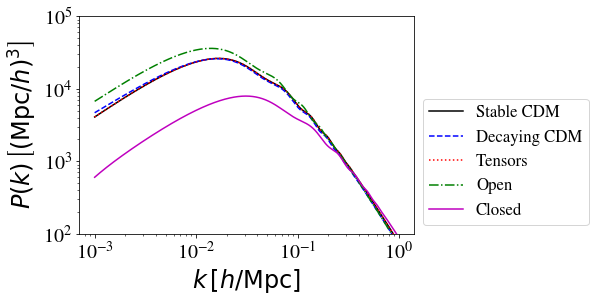

In [16]:
k = Pk_S['kvec']
plt.loglog(k, Pk_S['h']**3*Pk_S['Pk'],'k-')
plt.loglog(k, Pk_Dsmall['h']**3*Pk_Dsmall['Pk'],'b--')
plt.loglog(k, Pk_r['h']**3*Pk_r['Pk'],'r:')
plt.loglog(k, Pk_O['h']**3*Pk_O['Pk'],'g-.')
plt.loglog(k, Pk_C['h']**3*Pk_C['Pk'],'m-')

plt.ylim([1e2,1e5])
plt.legend([r"Stable CDM",
        r"Decaying CDM",
        r"Tensors",
        r"Open",
        r"Closed",
        ],loc=3,ncol=1,bbox_to_anchor=(1.0, 0.00))

plt.xlabel(r"$k\, \left[ h/\mathrm{Mpc} \right]$",fontsize=axislabelfontsize)
plt.ylabel(r"$P(k)\, \left[ \left( \mathrm{Mpc}/h \right)^3 \right]$",fontsize=axislabelfontsize)

0.000621297575086624


Text(0, 0.5, '$P(k)\\, \\left[ \\left( \\mathrm{Mpc}/h \\right)^3 \\right]$')

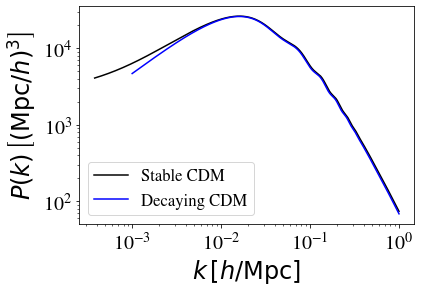

In [18]:
k = Pk_S['kvec']
yvalS = Pk_S['h']**3*Pk_S['Pk']
yvalDsmall = Pk_Dsmall['h']**3*Pk_Dsmall['Pk']

maxidxS = yvalS.argmax()
maxidxD = yvalDsmall.argmax()

delidx = maxidxS-maxidxD
delk = Pk_S['kvec'][maxidxS]-Pk_D['kvec'][maxidxD]

print(delk)
plt.loglog(k-delk, Pk_S['h']**3*Pk_S['Pk'],'k-')
plt.loglog(k, Pk_Dsmall['h']**3*Pk_Dsmall['Pk'],'b-')

#legend([r"$\Gamma_\mathrm{dcdm}=0.0 \frac{\mathrm{km}}{\mathrm{s}\cdot\mathrm{Mpc}}$",
#        r"$\Gamma_\mathrm{dcdm}=100.0 \frac{\mathrm{km}}{\mathrm{s}\cdot\mathrm{Mpc}}$"],loc=0)
plt.legend([r"Stable CDM",
        r"Decaying CDM",
        ],loc=3,ncol=1)

#xlabel(r"$\ell$")
#ylabel(r"$\ell(\ell+1) C_\ell^{TT}/2\pi$")
plt.xlabel(r"$k\, \left[ h/\mathrm{Mpc} \right]$",fontsize=axislabelfontsize)
plt.ylabel(r"$P(k)\, \left[ \left( \mathrm{Mpc}/h \right)^3 \right]$",fontsize=axislabelfontsize)

(0.7, 1.3)

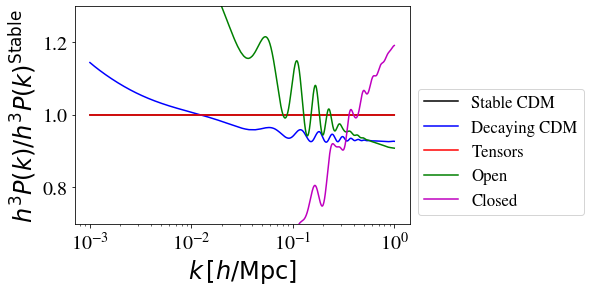

In [19]:
k = Pk_S['kvec']
Pkref = Pk_S['h']**3*Pk_S['Pk']
plt.semilogx(k, Pk_S['h']**3*Pk_S['Pk']/Pkref,'k-')
plt.semilogx(k, Pk_Dsmall['h']**3*Pk_Dsmall['Pk']/Pkref,'b-')
plt.semilogx(k, Pk_r['h']**3*Pk_r['Pk']/Pkref,'r-')
plt.semilogx(k, Pk_O['h']**3*Pk_O['Pk']/Pkref,'g-')
plt.semilogx(k, Pk_C['h']**3*Pk_C['Pk']/Pkref,'m-')

#legend([r"$\Gamma_\mathrm{dcdm}=0.0 \frac{\mathrm{km}}{\mathrm{s}\cdot\mathrm{Mpc}}$",
#        r"$\Gamma_\mathrm{dcdm}=100.0 \frac{\mathrm{km}}{\mathrm{s}\cdot\mathrm{Mpc}}$"],loc=0)
plt.legend([r"Stable CDM",
        r"Decaying CDM",
        r"Tensors",
        r"Open",
        r"Closed",
        ],loc=3,ncol=1,bbox_to_anchor=(1.0, 0.00))

#xlabel(r"$\ell$")
#ylabel(r"$\ell(\ell+1) C_\ell^{TT}/2\pi$")
plt.xlabel(r"$k\, \left[ h/\mathrm{Mpc} \right]$",fontsize=axislabelfontsize)
plt.ylabel(r"$h^3 P(k) / h^3 P(k)^\mathrm{Stable}$",fontsize=axislabelfontsize)
plt.ylim([0.7,1.3])

 Text(0, 0, '2'),
 Text(0, 0, '10'),
 Text(0, 0, '50')]

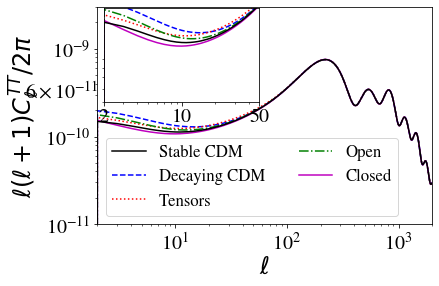

In [21]:
l = np.arange(2501)
plt.loglog(l, cl_S['all'],'k-',zorder = 10)
plt.loglog(l, cl_Dsmall['all'],'b--')
plt.loglog(l, cl_r['all'],'r:')
plt.loglog(l, cl_O['all'],'g-.')
plt.loglog(l, cl_C['all'],'m-')

plt.legend([r"Stable CDM",
        r"Decaying CDM",
        r"Tensors",
        r"Open",
        r"Closed",
        ],loc=3,ncol=2)

#xlabel(r"$\ell$")
#ylabel(r"$\ell(\ell+1) C_\ell^{TT}/2\pi$")
plt.xlabel(r"$\ell$",fontsize=axislabelfontsize)
plt.ylabel(r"$\ell(\ell+1) C_\ell^{TT}/2\pi$",fontsize=axislabelfontsize)
plt.xlim([2,2000])
plt.ylim([1e-11,3e-9])

#tight_layout()

#ax2 = axes([.18, .71, .4, .2], axisbg='w')
ax2 = plt.axes([.14, .55, .36, .325], facecolor='w')
plt.loglog(l, cl_S['all'],'k-',zorder = 10)
plt.loglog(l, cl_Dsmall['all'],'b--')
plt.loglog(l, cl_r['all'],'r:')
plt.loglog(l, cl_O['all'],'g-.')
plt.loglog(l, cl_C['all'],'m-')
plt.ylim([5e-11, 1.8e-10])
plt.xlim([2,50])
#setp(ax2, xticks=[], yticks=[])
plt.setp(ax2, xticks=[2,10,50],xticklabels=['2','10','50'],yticks=[])


Text(0, 0.5, '$\\ell(\\ell+1) C_\\ell^{TT}/2\\pi$')

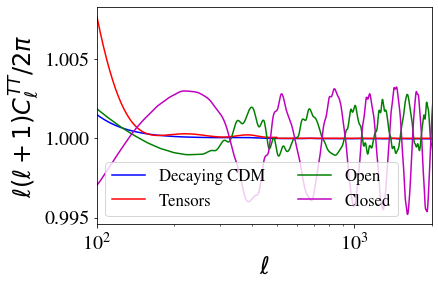

In [22]:
lstart=100
refCl = cl_S['all'][100:]
plt.semilogx(l[100:], cl_Dsmall['all'][100:]/refCl,'b-')
plt.semilogx(l[100:], cl_r['all'][100:]/refCl,'r-')
plt.semilogx(l[100:], cl_O['all'][100:]/refCl,'g-')
plt.semilogx(l[100:], cl_C['all'][100:]/refCl,'m-')

plt.xlim([lstart,2000])
#legend([r"$\Gamma_\mathrm{dcdm}=0.0 \frac{\mathrm{km}}{\mathrm{s}\cdot\mathrm{Mpc}}$",
#        r"$\Gamma_\mathrm{dcdm}=100.0 \frac{\mathrm{km}}{\mathrm{s}\cdot\mathrm{Mpc}}$"],loc=0)
plt.legend([r"Decaying CDM",
        r"Tensors",
        r"Open",
        r"Closed",
        ],loc=3,ncol=2)

#xlabel(r"$\ell$")
#ylabel(r"$\ell(\ell+1) C_\ell^{TT}/2\pi$")
plt.xlabel(r"$\ell$",fontsize=axislabelfontsize)
plt.ylabel(r"$\ell(\ell+1) C_\ell^{TT}/2\pi$",fontsize=axislabelfontsize)
#ylim([1e-11,5e-9])
#tight_layout()

all All
lisw Late ISW
eisw Early ISW
tsw SW
dop Doppler
pol Polarisation


(1e-13, 1e-06)

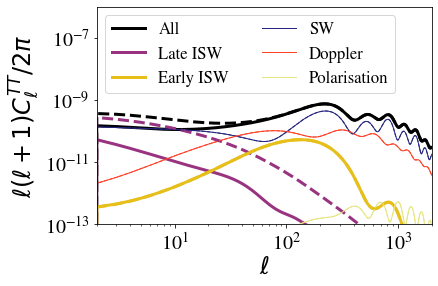

In [24]:
#c = {'all':'k','lisw':'r','eisw':'b','tsw':'g','dop':'c','pol':'y','all-lisw':'b'}
#c = {'all':[0.,0.,0.],'lisw':[0.3,0.15,0.75],'eisw':[1.,0.25,0.15],'tsw':[0.15,0.15,0.5],'dop':[0.6,0.20,0.5],'pol':[0.9,0.5,0.],'all-lisw':'b'}
c = {'all':[0.,0.,0.],'lisw':[0.60, 0.20, 0.50],'eisw':[0.90, 0.75, 0.10],'tsw':[0.15,0.15,0.5],'dop':[1.00, 0.25, 0.15],'pol':[0.90, 0.90, 0.50],'all-lisw':'b'}

leg_dict = {'all':'All','lisw':'Late ISW','eisw':'Early ISW','tsw':'SW','dop':'Doppler','pol':'Polarisation','all-lisw':'All-Late ISW'}
lw = {'all':3,'lisw':3,'eisw':3,'tsw':1,'dop':1,'pol':1,'all-lisw':1} 
leg = [];
tcvec2 = ['all','lisw','eisw','tsw','dop','pol']
for key in tcvec2:
    plt.loglog(l, cl_S[key],color=c[key],ls='-',lw=lw[key])
    print(key, leg_dict[key])
    leg.append(leg_dict[key])

#legend(['All','Early ISW','Late ISW','SW','Doppler','Polarisation'],loc=2)
plt.legend(leg,loc=2,ncol=2)

for key in tcvec2:
    plt.loglog(l, cl_D[key],color=c[key],ls='--',lw=lw[key])
    
plt.xlabel(r"$\ell$",fontsize=axislabelfontsize)
plt.ylabel(r"$\ell(\ell+1) C_\ell^{TT}/2\pi$",fontsize=axislabelfontsize)
plt.xlim([2,2000])
plt.ylim([1e-13,1e-6])